This file tries out the classes and methods defined in he modules_QW file

In [2]:
from QuantumRandomWalks.modules_QW import *
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

## Network import and pre-processing

Added 13 unconnected nodes to reach 64 total.
Node Mapping Table:
Total number of nodes after relabeling: 64


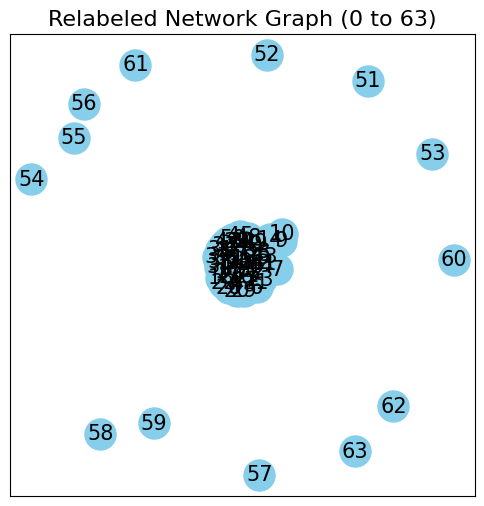

In [5]:


# Step 1: Load the CSV
csv_path = r"C:\Users\joseh\Codequantum\Class1-mathmethods\qiskit\Class_structure\edges-morethan1.csv"  # Replace with your CSV file path
df = pd.read_csv(csv_path)

# Step 2: Create edges from 'Target' to 'Source'
edges = list(zip(df['Source'], df['Target']))

# Step 3: Define the network graph (undirected)
G = nx.Graph()  # Use Graph() for an undirected graph
G.add_edges_from(edges)

# Step 4: Remove nodes with degree 0 or 1
nodes_to_remove = [node for node, degree in dict(G.degree()).items() if degree <= 1]
G.remove_nodes_from(nodes_to_remove)

# Step 5: Add unconnected nodes to reach 64 total
current_num_nodes = G.number_of_nodes()
additional_nodes_needed = 64 - current_num_nodes

if additional_nodes_needed > 0:
    # Create a list of new node IDs that do not overlap with existing nodes
    max_node_id = max(G.nodes) if len(G.nodes) > 0 else -1
    new_nodes = range(max_node_id + 1, max_node_id + 1 + additional_nodes_needed)
    G.add_nodes_from(new_nodes)
    print(f"Added {additional_nodes_needed} unconnected nodes to reach 64 total.")

# Step 6: Relabel nodes to range from 0 to 63
old_to_new_mapping = {old_id: new_id for new_id, old_id in enumerate(G.nodes())}
G = nx.relabel_nodes(G, old_to_new_mapping)

# Step 7: Create a table mapping old IDs to new IDs
mapping_table = pd.DataFrame(list(old_to_new_mapping.items()), columns=["Old ID", "New ID"])
print("Node Mapping Table:")


# Step 8: Verify the total number of nodes
total_nodes = G.number_of_nodes()
print(f"Total number of nodes after relabeling: {total_nodes}")

# Step 9: Plot the relabeled graph
plt.figure(figsize=(6, 6))
nx.draw_networkx(G, with_labels=True, node_color='skyblue', node_size=500, font_size=15)
plt.title("Relabeled Network Graph (0 to 63)", fontsize=16)
plt.show()

In [6]:
# Step 3: Adjacency matrix of the graph
adj_matrix = nx.adjacency_matrix(G).toarray()
print("Adjacency Matrix:")
print(adj_matrix)

# Define the Hermitian matrix A for use in the quantum link prediction
A = adj_matrix.astype(float)

Adjacency Matrix:
[[0 1 0 ... 0 0 0]
 [1 0 1 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [7]:
print(len(A))

64


## Quantum circuit creation

### Single node walk

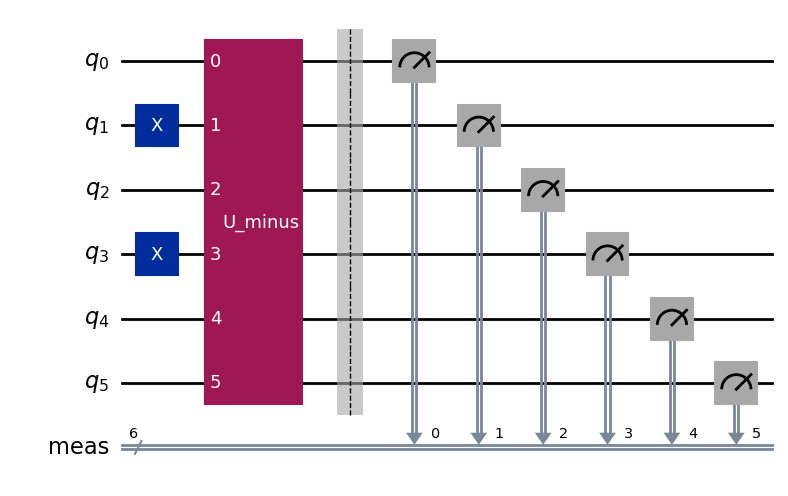

In [8]:
qrw = QuantumRandomWalk(A)
qrw.start_node_n(10)
qrw.walk_out(1)
qrw.complete_single_node()
qrw._qc.draw("mpl")

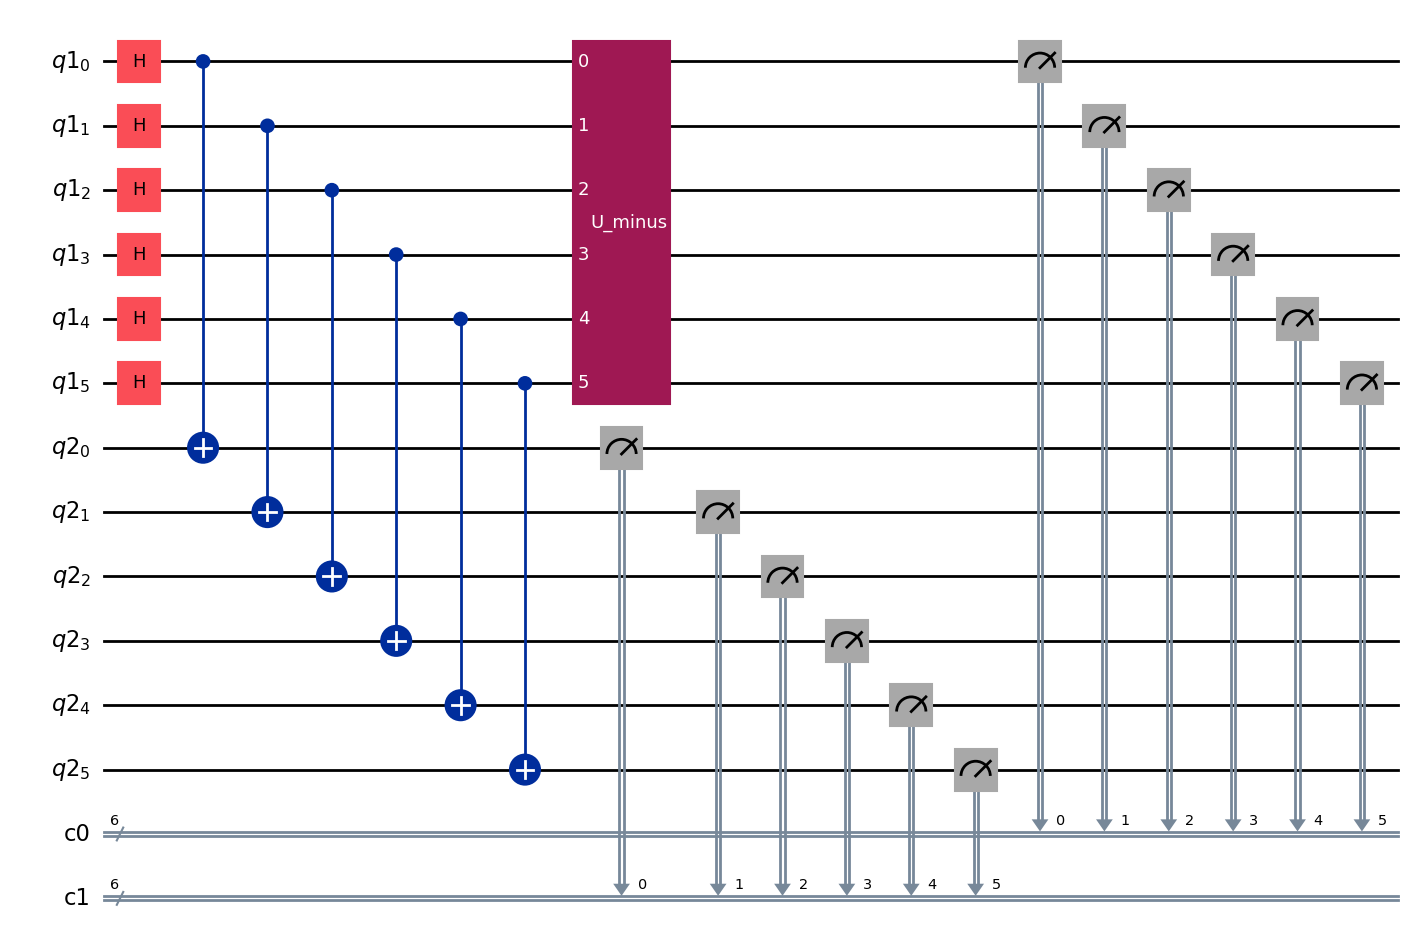

In [6]:
qrw2=QuantumRandomWalk(A)
qrw2.superposition()
qrw2.walk_out(1)
qrw2.complete_superposition()
qrw2._qc.draw("mpl")

In [7]:
qrw2.simulator_measure('aer_simulator')
print(qrw2._counts)

{'011010 011110': 1, '000000 000000': 11, '011011 011011': 8, '100011 100011': 10, '001111 001111': 17, '110110 110110': 19, '001011 010110': 1, '001100 001100': 17, '000010 000001': 2, '010011 010011': 13, '101010 101010': 12, '101100 101100': 11, '100101 100101': 18, '101010 101101': 1, '011110 011110': 9, '001010 001110': 5, '100001 100001': 18, '101111 001100': 1, '111000 111000': 11, '110000 100100': 1, '010001 010110': 2, '100111 100111': 12, '110100 110100': 18, '001101 100000': 1, '111110 111110': 12, '001011 110010': 1, '000101 010000': 1, '000111 000110': 2, '000000 000100': 1, '011010 011010': 14, '100110 100110': 19, '110101 110101': 18, '001101 110001': 1, '001000 001010': 3, '000101 001000': 1, '001101 010101': 3, '011011 010111': 1, '001011 001011': 6, '010000 101100': 2, '011100 000101': 1, '000000 001101': 1, '011111 011111': 9, '000000 000101': 1, '001101 011110': 6, '000100 000100': 8, '111011 111011': 25, '100100 010100': 1, '101101 101011': 1, '010111 010111': 11, 

## Run single node quantum walk 

In [8]:
df_complete = perform_one_node_walk(A,9,'out',10,0.5)

print(df_complete)



    Time         0         1         2         3         4         5  \
0    0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1    0.5  0.000000  0.000000  0.000000  0.000977  0.000000  0.000000   
2    1.0  0.000000  0.003906  0.000000  0.000000  0.001953  0.000000   
3    1.5  0.002930  0.004883  0.001953  0.002930  0.026367  0.003906   
4    2.0  0.006836  0.000000  0.007812  0.000977  0.021484  0.006836   
5    2.5  0.004883  0.004883  0.003906  0.006836  0.001953  0.005859   
6    3.0  0.000977  0.009766  0.000000  0.000977  0.002930  0.000000   
7    3.5  0.000977  0.001953  0.000000  0.000000  0.002930  0.000000   
8    4.0  0.000000  0.009766  0.000000  0.000000  0.003906  0.000000   
9    4.5  0.002930  0.015625  0.001953  0.001953  0.003906  0.002930   
10   5.0  0.013672  0.001953  0.005859  0.007812  0.023438  0.010742   
11   5.5  0.005859  0.026367  0.006836  0.013672  0.019531  0.009766   
12   6.0  0.001953  0.040039  0.002930  0.002930  0.000000  0.00

In [9]:
df_processed = ResultsDataframe(df_complete).postprocess_one_node()

df_complete.to_csv('trialwith9_module-1.csv', index= False)

# Run superpositioned quantum walk

In [20]:
df_complete = perform_superpositioned_walk(A,'out',10,0.5)
df_processed = ResultsDataframe(df_complete)
df_processed = df_processed.postprocess_superposition(A)

df_processed.df.to_csv('superpositiontrial1.csv', index=False)
